In [91]:
# import the needed libs
import numpy as np # For different array operations
import pandas as pd # For dealing with CSV files and creating DataFrames
import matplotlib.pyplot as plt # For plotting the graphs
from sklearn.model_selection import train_test_split # For splitting the data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Different loss funcitons

## Pseudo-Inverse approach and linear regression

Loading Telecom Traffic Data from the CSV file.

In [92]:
df = pd.read_csv('Traffic Data Applied Linear Algebra.csv')
df = df[["DayOfWeek", "Period", "PricePerGB", "Arrivals"]]
df = df.sort_values(by=["DayOfWeek", "Period"], ascending=True)
df = df.reset_index(drop=True)
df.head()

,DayOfWeek,Period,PricePerGB,Arrivals
0,1,1,1,39
1,1,2,1,49
2,1,2,1,51
3,1,3,1,56
4,1,3,1,45


Splitting the data into train/test.

In [93]:
features = ["DayOfWeek", "Period", "PricePerGB"]
target = ["Arrivals"]
X = df[features]
Y = df[target]

train_X, test_X, train_Y, tset_Y = train_test_split(X, Y, test_size=0.25, shuffle=True)

Here is the core of the model, calculating the Pseudo-Inverse and getting fitted coefficients.

In [94]:
X_pinv = np.linalg.pinv(train_X)
coefficients = np.dot(X_pinv, train_Y)
print(coefficients)

[[4.44147791]
 [0.96413574]
 [5.35236056]]


Now use the coefficients to compute the dot product with the test split to obtain the predicted values $\hat{y}$ ($A x = \hat{y}$) -> $A$ is the split set values and $x$ is the coefficients we calculated above.

In [95]:
pred_Y = np.dot(test_X, coefficients)
print(pred_Y.flatten()[:5])

[26.76908107 54.32883121 54.12309708 18.03860627 36.99537345]


Calculate the next 100 days inputs

In [96]:
number_of_periods_per_day = 24
number_of_next_periods = 100
i = 0
day_of_week = 0
day_of_week_arr = []
periods_arr = []

while i < number_of_next_periods:
    day_of_week = (day_of_week + 1) % 7
    for period in range(1 ,number_of_periods_per_day+1):
        day_of_week_arr.append(day_of_week)
        periods_arr.append(period)
        i = i + 1
        if i >= 100:
            break



# 4. Random PricePerGB (1 or 2)
price_per_gb = np.random.choice([1, 2], size=number_of_next_periods)

# Build df
next_100_days_df = pd.DataFrame({
    "DayOfWeek": day_of_week_arr,
    "Period": periods_arr,
    "PricePerGB": price_per_gb
}).sort_values(by=["DayOfWeek", "Period"], ascending=True)

next_100_days_df.head()

,DayOfWeek,Period,PricePerGB
0,1,1,1
1,1,2,2
2,1,3,2
3,1,4,1
4,1,5,2


Now let's predict the next 100 days

In [97]:
next_100_days_Y = np.dot(next_100_days_df, coefficients)
print(next_100_days_Y.flatten()[:5])

[10.75797422 17.07447053 18.03860627 13.65038145 19.96687776]


Plotting all the data

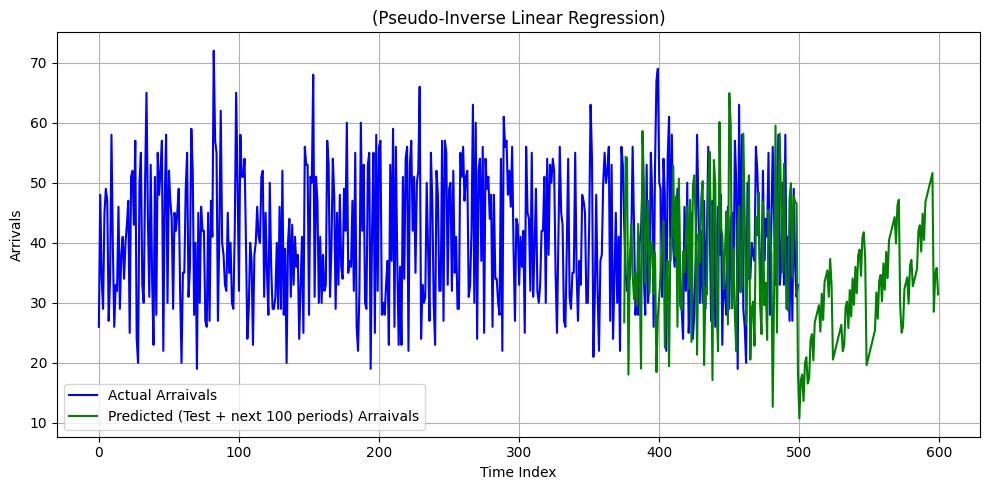

In [98]:
all_actual_data = np.concatenate((train_Y.values, tset_Y.values))
all_predicted = np.concatenate((pred_Y.flatten(), next_100_days_Y.flatten()))

# Create a continuous time axis
actual_data_index = np.arange(len(all_actual_data))
predected_data_index = np.arange(len(train_Y), len(train_Y) + len(all_predicted))

plt.figure(figsize=(10, 5))

# --- Plot sections ---

# 1. Plot all actual
plt.plot(actual_data_index, all_actual_data, label="Actual Arraivals", color="blue")

# 3. Plot predictions on top of test
plt.plot(predected_data_index, all_predicted, label="Predicted (Test + next 100 periods) Arraivals", color="green")

# Labels, title, etc.
plt.title("(Pseudo-Inverse Linear Regression)")
plt.xlabel("Time Index")
plt.ylabel("Arrivals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plot only the test part to see our predictions accuracy

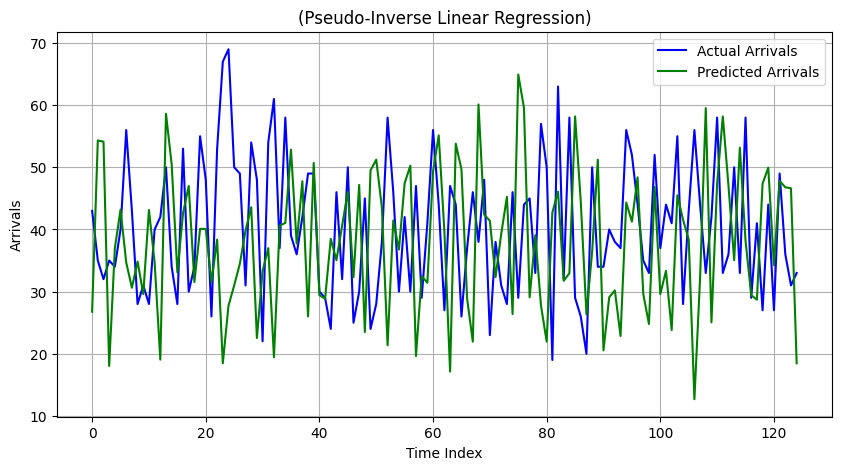

In [99]:
actual = tset_Y.values.flatten()
predicted = pred_Y.flatten()

plt.figure(figsize=(10, 5))

# Plot actual values
plt.plot(actual, label="Actual Arrivals", color="blue")

# Plot predicted values
plt.plot(predicted, label="Predicted Arrivals", color='green')

plt.title("(Pseudo-Inverse Linear Regression)")
plt.xlabel("Time Index")
plt.ylabel("Arrivals")
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Convert to flat arrays
y_true = tset_Y.values.flatten()
y_pred_flat = pred_Y.flatten()

# --- Error metrics ---
mae = mean_absolute_error(y_true, y_pred_flat)
mse = mean_squared_error(y_true, y_pred_flat)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred_flat)

# --- Print ---
print("Model Evaluation:")
print(f"MAE  (Mean Absolute Error): {mae:.4f}")
print(f"MSE  (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R²   (R-squared): {r2:.4f}")

Model Evaluation:
MAE  (Mean Absolute Error): 14.1977
MSE  (Mean Squared Error): 293.2747
RMSE (Root Mean Squared Error): 17.1253
R²   (R-squared): -1.4573
